In [ ]:
### Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import data file

In [19]:
data = pd.read_csv('/content/drive/MyDrive/Advertising_sale_Model/Advertising.csv')
data.drop(data.columns[0], axis=1, inplace=True)
data.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Shape

In [20]:
data.shape

(200, 4)

### Check for Null values

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Univariate Measures

In [22]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Visualize the Data

<Axes: xlabel='newspaper', ylabel='sales'>

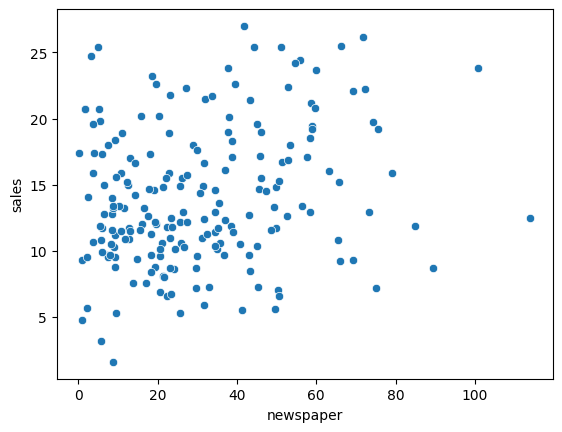

In [23]:
sns.scatterplot(data = data, x='newspaper', y = 'sales')

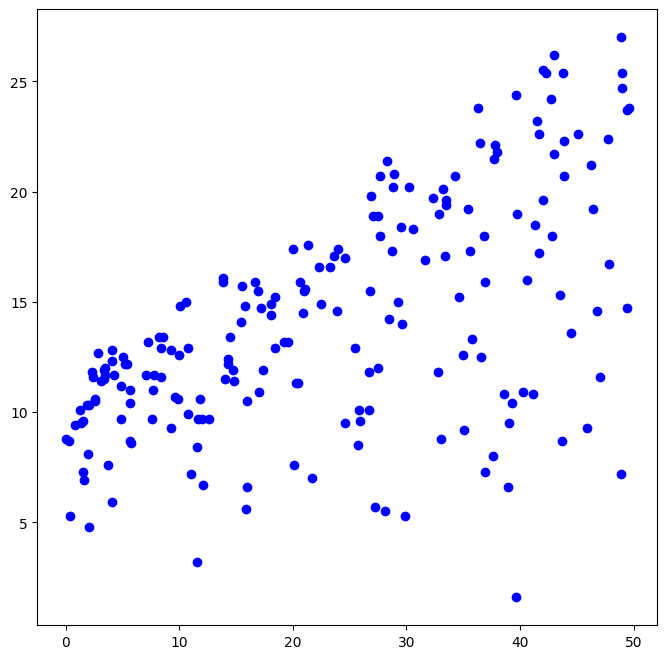

In [24]:

plt.figure(figsize=(8,8))

plt.scatter(data['radio'], data['sales'], c='b')

plt.show()

<Axes: xlabel='TV', ylabel='sales'>

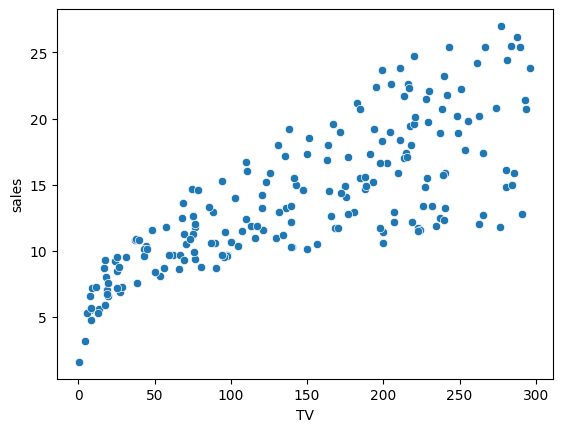

In [25]:
sns.scatterplot(data= data, x='TV', y = 'sales')

### Check for correlation

In [26]:
data_correlation = data.corr()
data_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Heatmap

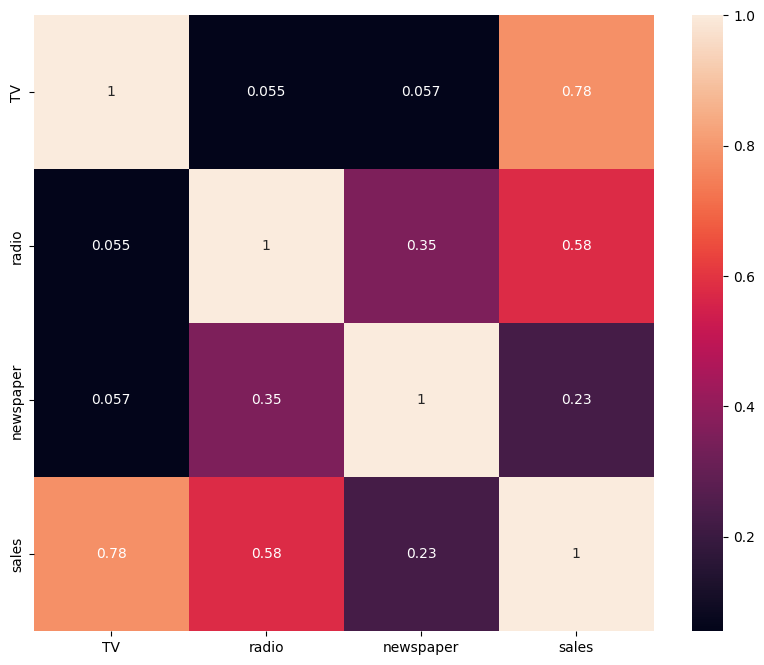

In [27]:
plt.subplots(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True)
plt.show()

### Linear Regression Function
Creating a function for Linear Regression Model fit on the data

In [34]:

target_name = "sales"
X = data.drop(target_name, axis=1)
Y = data[target_name]

x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print("Linear Regression: ")
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)


Linear Regression: 


LinearRegression()

In [35]:

training_score = linear_regression.score(x_train, y_train)
print("Training score: ", training_score)

Training score:  0.9142548284669865


In [36]:


y_pred = linear_regression.predict(x_test)

testing_score = r2_score(y_test, y_pred)
print("Testing Score : ", testing_score)


Testing Score :  0.8132567750002886


     y_test     y_pred
95     16.9  16.215993
19     14.6  14.296864
178    11.8  16.143033
198    25.5  23.649449
45     14.9  15.213151
88     12.9  11.411832
72      8.8  10.446477
106     7.2   6.094143
83     13.6  14.420485
50     11.4  12.643278


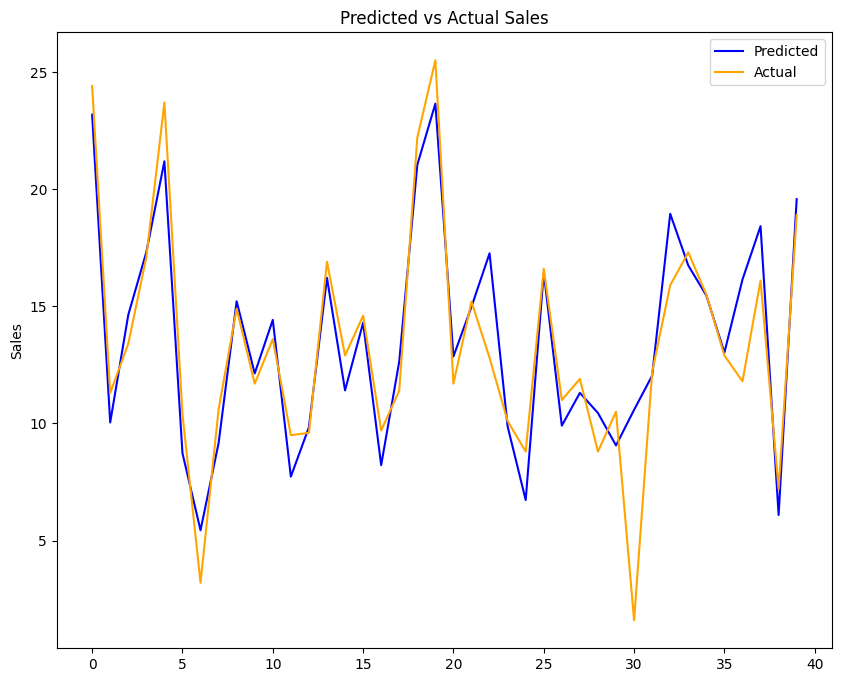

In [37]:

df_y = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

print(df_y.sample(10))

plt.figure(figsize=(10, 8))
plt.plot(y_pred, label='Predicted', color='blue')
plt.plot(y_test.values, label='Actual', color='orange')
plt.ylabel("Sales")
plt.title("Predicted vs Actual Sales")
plt.legend()
plt.show()

results = {
    'model': linear_regression,
    'x_train': x_train,
    'x_test': x_test,
    'y_train': y_train,
    'y_test': y_test,
    'y_pred': y_pred,
    'sample': df_y.sample(10)
}